In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (8,8)
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['lines.linewidth'] = 2


net_dir = "/mnt/data0/emastr/article_training_nodecay/"
MESH_PATH = "/home/emastr/deep-micro-slip-model/data/mesh/"
figures_dir = "/home/emastr/deep-micro-slip-model/data/figures/"
simulation_dir = "/home/emastr/deep-micro-slip-model/data/stokes_fenics/"

In [2]:
full = np.load(f'{simulation_dir}full_sim.npz')
deep = np.load(f'{simulation_dir}hmm_deep_svd.npz')
hmm = np.load(f'{simulation_dir}hmm_classic.npz')
naive = np.load(f'{simulation_dir}naive_sim.npz')
t = full['t']
g = full['g']
xlist = full['x']
ylist = full['y']

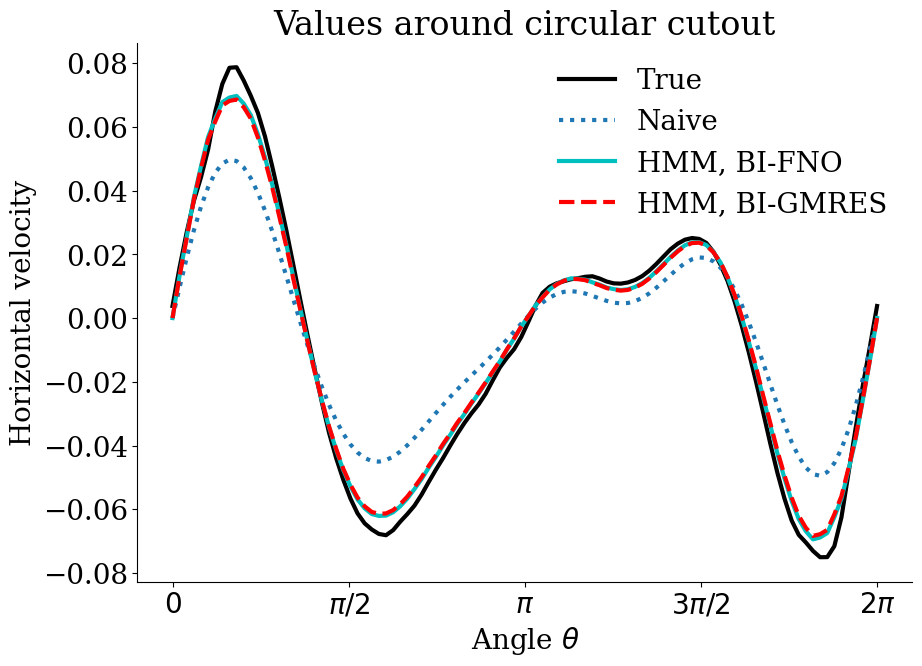

In [3]:
methods = {'True': full['u'], 'Naive': naive['u'], 'HMM, BI-FNO': deep['u'], 'HMM, BI-GMRES': hmm['u']}
styles = {'True': 'k-', 'Naive': ':', 'HMM, BI-FNO': 'c-', 'HMM, BI-GMRES': 'r--'}
i = 10


plt.figure(figsize=(10,7))
for key in methods.keys():
    plt.plot(t, methods[key][i], styles[key], label=key, linewidth=3)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.title("Values around circular cutout")
plt.xlabel("Angle $\\theta$")
plt.ylabel("Horizontal velocity")

plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], [r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$", r"$2\pi$"])

plt.legend(frameon=False, loc='upper right')
plt.gcf().savefig(f"{figures_dir}cylinder_error_angular.pdf", bbox_inches='tight')

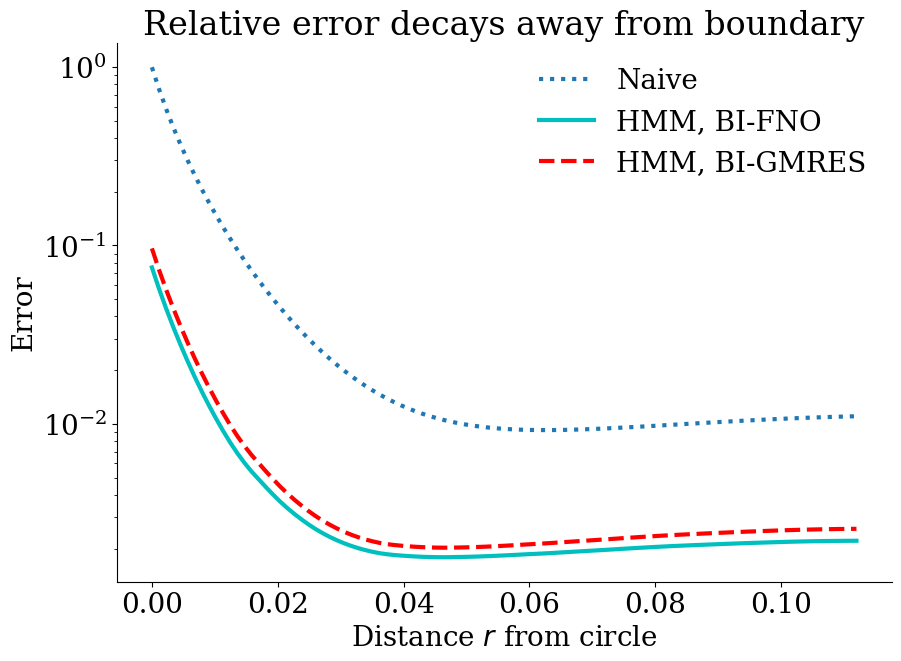

In [4]:
# Mean square Relative error as function of distance from circle

distances = np.array([xlist[i][0]-xlist[0][0] for i in range(len(xlist))])
errors = {key: np.array([np.mean((methods[key][i]-methods['True'][i])**2)/np.mean(methods['True'][i]**2) for i in range(len(xlist))]) for key in methods.keys()}

plt.figure(figsize=(10,7))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

for key in methods.keys():
    if key != "True":
        plt.plot(distances, errors[key], styles[key], label=key, linewidth=3)
plt.title("Relative error decays away from boundary")
plt.yscale('log')
plt.xlabel("Distance $r$ from circle")
plt.ylabel("Error")
plt.legend(frameon=False)
plt.gcf().savefig(f"{figures_dir}cylinder_error_radial.pdf", bbox_inches='tight')

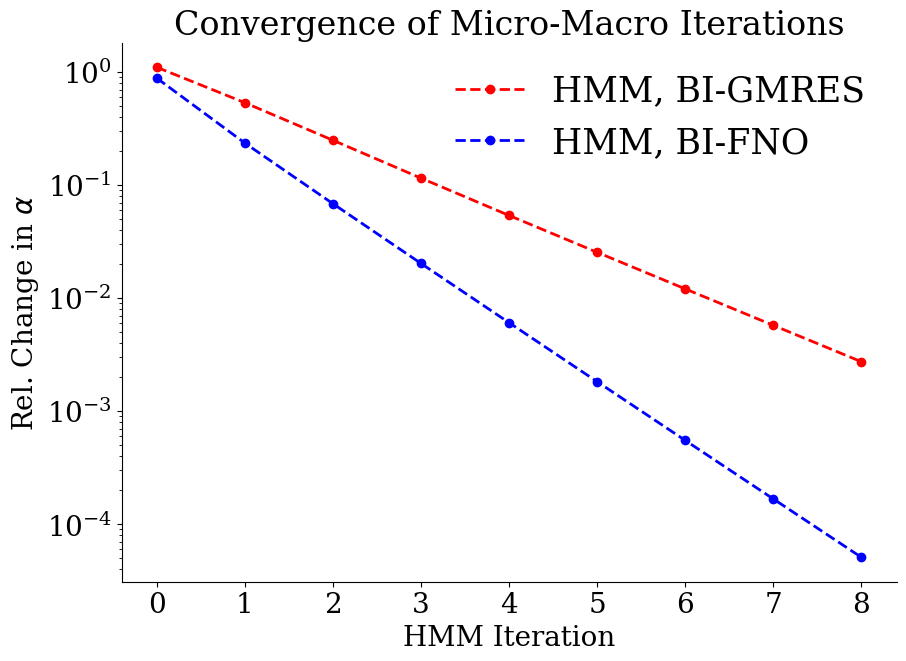

In [5]:
a1 = np.load(f'{simulation_dir}hmm_classic_conv.npz')['alpha_res']
a2 = np.load(f'{simulation_dir}hmm_deep_conv.npz')['alpha_res']


plt.figure(figsize=(10,7))
plt.semilogy(a1, 'ro--', label='HMM, BI-GMRES')
plt.semilogy(a2, 'bo--', label='HMM, BI-FNO')
plt.xlabel("HMM Iteration")
plt.ylabel("Rel. Change in $\\alpha$")
plt.legend(frameon=False, fontsize=25)
plt.title("Convergence of Micro-Macro Iterations")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gcf().savefig(f"{figures_dir}hmm_convergence.pdf", bbox_inches='tight')